# SAT Optics Simulation: Near-field

This notebook shows the optical path of the Simons Observatory SAT optics tube.  The ray-trace produces the electric field at the window (opening) of the SAT, which is in the near-field.  This field is convolved with a square to reproduce holography measurements, since the holography source emits its signal out of a rectangular feedhorn. 

Grace E. Chesmore
March 2022

### Optical Path
We first ray-trace from the focal plane through the 3 lenses, and out to 300mm in front of the window.  The $\verb|tele_geo.y_source|$ variable changes the plane of the rays in front of the window, since this is where the holography source will eventually scan. 

The $\verb|ray_trace.rx_to_lyot|$ outputs the amplitude and pathlength $d_{\text{PL}}$ of the rays in front of the window.  The pathlength information can be converted to phase $\phi$ due to the relationship:
$$ \phi = d_{\text{PL}} \frac{\lambda}{2\pi}$$

/home/chesmore/Desktop/Code/SO SAT OT/sosat-optics/sosat_optics/ot_geo.py:69: RuntimeWarning: invalid value encountered in sqrt
  amp = (c * r ** 2) / (1 + np.sqrt(1 - ((1 + k) * c ** 2 * r ** 2)))
/home/chesmore/Desktop/Code/SO SAT OT/sosat-optics/sosat_optics/ot_geo.py:114: RuntimeWarning: invalid value encountered in sqrt
  coeff_2 = (c * 2) / (1 + np.sqrt(1 - ((1 + k) * c ** 2 * r ** 2)))
/home/chesmore/Desktop/Code/SO SAT OT/sosat-optics/sosat_optics/ot_geo.py:116: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(1 - ((1 + k) * c ** 2 * r ** 2))
/home/chesmore/Desktop/Code/SO SAT OT/sosat-optics/sosat_optics/ot_geo.py:117: RuntimeWarning: invalid value encountered in sqrt
  * (1 + np.sqrt(1 - ((1 + k) * c ** 2 * r ** 2))) ** 2


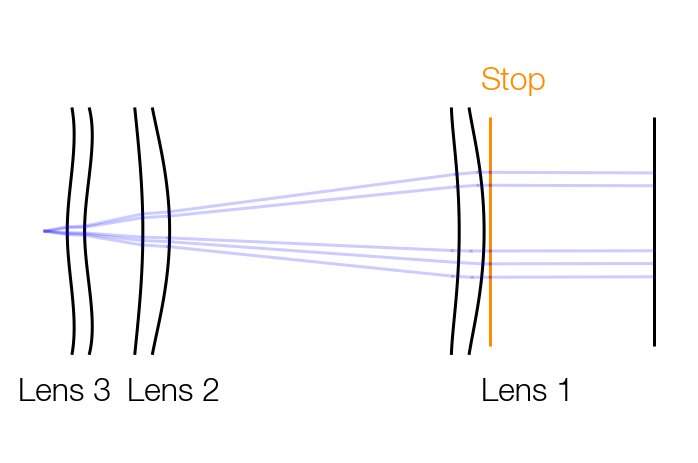

In [26]:
import numpy as np
import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
%matplotlib inline
# %load_ext blackcellmagic

font_manager.fontManager.addfont(
    "/home/chesmore/.local/share/fonts/HelveticaNeueLight.ttf"
)
matplotlib.rcParams["font.family"] = "Helvetica Neue"
matplotlib.rcParams["font.size"] = 16
matplotlib.rcParams.update({"axes.grid" : False, "grid.color": "grey", "grid.alpha": .2, 'xtick.direction':'in','ytick.direction':'in'})
%config InlineBackend.figure_format = 'retina'

import imp
ot_geo = imp.load_source('ot_geo', '/home/chesmore/Desktop/Code/SO SAT OT/sosat-optics/sosat_optics/ot_geo.py')
ray_trace = imp.load_source('ray_trace', '/home/chesmore/Desktop/Code/SO SAT OT/sosat-optics/sosat_optics/ray_trace.py')
opt_analyze = imp.load_source('opt_analyze', '/home/chesmore/Desktop/Code/SO SAT OT/sosat-optics/sosat_optics/opt_analyze.py')

tele_geo = ot_geo.LatGeo()
tele_geo.n_scan = 20
tele_geo.y_source = ot_geo.y_lyot + 300

plt.figure(figsize = (6,4))
output_rx = ray_trace.rx_to_lyot([0, 0, 0], tele_geo, 1, "b")
plt.vlines(x=ot_geo.y_lyot, ymin=-210, ymax=210, color="darkorange", linestyle="-")
plt.vlines(x=tele_geo.y_source, ymin=-210, ymax=210, color="k", linestyle="-")
# plt.title("SAT Optics Tube")
# plt.ylabel("[mm]")
# plt.xlabel("[mm]")
plt.axis('off')
plt.axis("equal")

plt.annotate("Lens 3",xy = (-50,-310))
plt.annotate("Lens 2",xy = (150,-310))
plt.annotate("Lens 1",xy = (800,-310))
plt.annotate("Stop",xy = (800,260),color = 'darkorange')
plt.show()

# cc = np.where(output_rx[0] ** 2 + output_rx[2] ** 2 < (600 / 2) ** 2)

# output_rx[3] = np.where(np.isnan(output_rx[3])==False,output_rx[3],0)

# plt.figure(figsize=(12, 4))
# plt.suptitle("Fields at Window from Receiver", y=1.05)
# plt.subplot(122)
# plt.scatter(
#     output_rx[0][cc],
#     output_rx[2][cc],
#     c=np.mod(
#         tele_geo.k * (output_rx[3][cc] - np.mean(output_rx[3][cc])) / 1e3, 2 * np.pi
#     ),
#     s=15,
# )
# plt.colorbar(label="rad.")
# plt.axis("equal")
# plt.title("Phase")
# plt.xlabel("[mm]")
# plt.ylabel("[mm]")
# plt.subplot(121)
# plt.scatter(
#     output_rx[0][cc],
#     output_rx[2][cc],
#     c=20 * np.log10(output_rx[4][cc] / np.max(output_rx[4][cc])),
#     s=15,
# )
# plt.colorbar(label="dB")
# plt.axis("equal")
# plt.title("Amplitude [dB]")
# plt.xlabel("[mm]")
# plt.ylabel("[mm]")
# plt.show()

## Holography Measurement

We will eventually measure these fields with holography.  A rectangular feedhorn emits the signal into the optics tube, convolving the measured beam, and therefor we need to account for this convolution in our simulation. 

A convolution of the fields shows the amplitude of the beam fall off quickly at ~10cm radius from center.  The phase also remains relatively constant in front of the window. 

<ipython-input-2-d5d0050810dd>:31: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x/1e1, y/1e1, 20 * np.log10(abs(beam_final) / np.max(abs(beam_final))), vmin=-50,shading = 'auto')


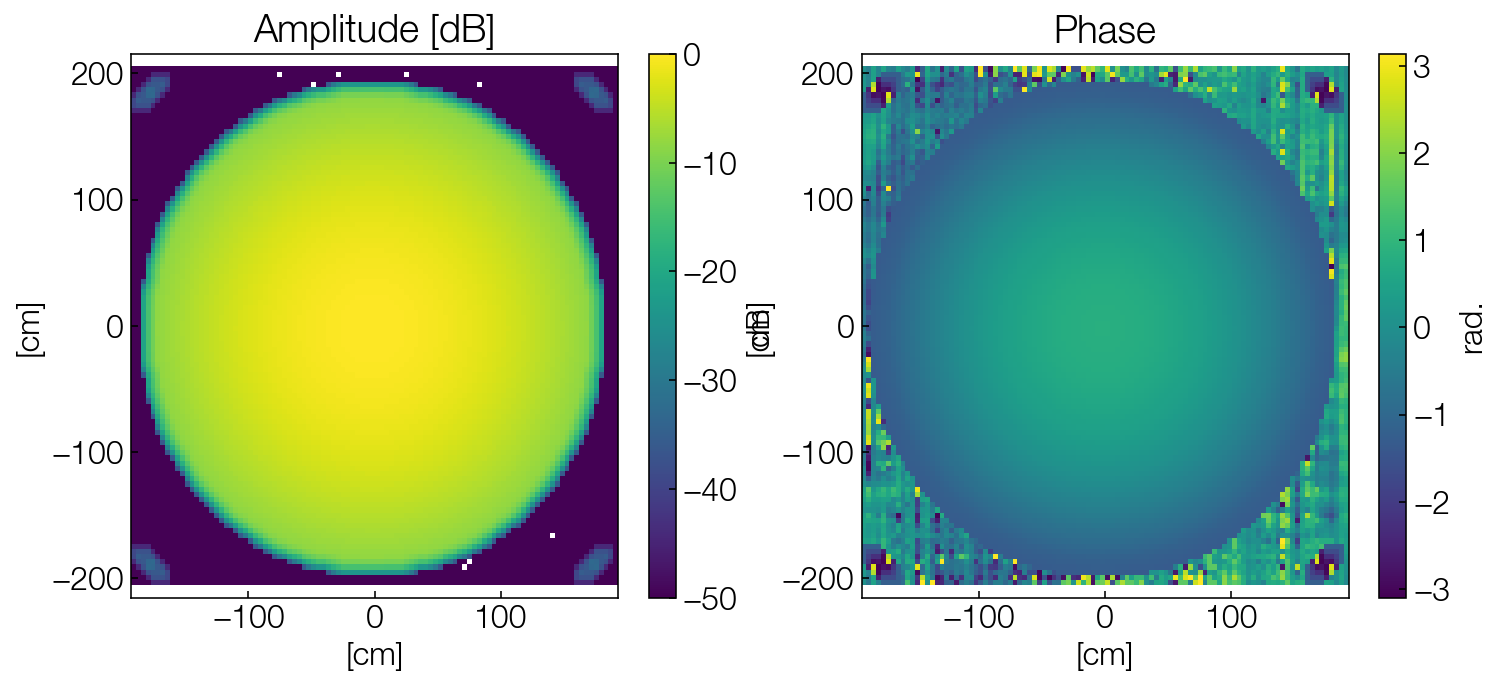

In [2]:
# Regrid the ray-trace results into a 2D grid for easier plotting purposes
len_sim = int(np.sqrt(len(output_rx[0])))
x_sim = np.reshape(output_rx[0], (len_sim, len_sim))  # [mm]
y_sim = np.reshape(output_rx[2], (len_sim, len_sim))  # [mm]

x_sim_new = np.linspace(np.min(x_sim[np.where(np.isnan(x_sim)==False)]),np.max(x_sim[np.where(np.isnan(x_sim)==False)]),len_sim)
y_sim_new = np.linspace(np.min(y_sim[np.where(np.isnan(y_sim)==False)]),np.max(y_sim[np.where(np.isnan(y_sim)==False)]),len_sim)
x_sim,y_sim = np.meshgrid(x_sim_new,y_sim_new)

a_sim = np.reshape(output_rx[4], (len_sim, len_sim))
p_sim = np.reshape(output_rx[3], (len_sim, len_sim))
p_sim = np.mod(tele_geo.k * (p_sim - np.mean(p_sim)) / 1e3, 2 * np.pi)

# Define the complex beam from ray-trace outputs
noise = 1e-5 # signal-to-noise of holography setup
a_sim /= np.max(abs(a_sim))

beam_sim = a_sim * np.exp(np.complex(0, 1) * p_sim)

# Define the dimmensions of the waveguide
apert1 = 180 # [mm]
apert2 = 190 # [mm]

# Convolve beam
x, y, beam_final = opt_analyze.beam_convolve(
    np.real(x_sim), np.real(y_sim), beam_sim, apert1, apert2
)

plt.figure(figsize = (12,5))
plt.subplot(121)
plt.pcolormesh(x/1e1, y/1e1, 20 * np.log10(abs(beam_final) / np.max(abs(beam_final))), vmin=-50,shading = 'auto')
plt.colorbar(label = 'dB')
plt.axis("equal")
plt.title("Amplitude [dB]")
plt.xlabel("[cm]")
plt.ylabel("[cm]")

plt.subplot(122)
plt.pcolormesh(x/1e1, y/1e1, np.arctan2(np.imag(beam_final),np.real(beam_final)),shading = 'auto')
plt.colorbar(label = 'rad.')
plt.axis("equal")
plt.title("Phase")
plt.xlabel("[cm]")
plt.ylabel("[cm]")
plt.show()